# Data Visualization


When we have thousands of sampled numerical data, it makes no sence without classifying them and analyzing them. Many Statistical tools are available to classify the data in Python. `pandas` is one such library. After classifying the data, it is useful to visualize the classified data. Visualization can result in greater understanding of Data, such as Corelation and so on. `matplotlib` is one of the famous, easy-to-use library for data visualization

## Standard Import statement


In `matplotlib`, we won't use entire library. We just use a part of library which is dedicated for plotting data. In further discussions related about `matplotlib`, we assume that the reader has imported the library in following manner

In [51]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

## Our First Graph - A Parabola

$y = x^2$ is the equation of standard parabola. We sample some $x$ values and calculate the square of them. Then we plot a graph of $y$ versus $x$ to obtain the parabola 

In [52]:
import numpy as np

In [53]:
x = np.arange(50)  # 0..19
y = x**2

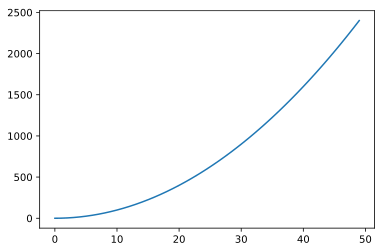

In [54]:
plt.plot(x,y) # First argument is x data, second data is y data
# plt.show() , If in Python Script

**Note** 

If not using a Interactive Notebook or `IPython` shell, then issue a

    plt.show()

to see the plot

Also see how `matplotlib` converted set of points to represent a parabola by **interpolation**

## Customizing the Graph - Changing its type and color


When representing various data in graph, different style must be used to distinguish between the data sets. In this section, we will see how to manipulate the line style and color. Following are the named arguments that are sent to `plot()` functions.

### `linestyle = value` 
can be used to change line style. 

We shall see the inbuilt `lineStyles` dict to see what are the possible styles for `value`

     {'-': '_draw_solid', '--': '_draw_dashed', '-.': '_draw_dash_dot', ':': '_draw_dotted', 'None': '_draw_nothing', ' ': '_draw_nothing', '': '_draw_nothing'}
     
### `color = value`

can be used to change color of line. `value` can be one of

- b: blue
- g: green
- r: red
- c: cyan
- m: magenta
- y: yellow
- k: black
- w: white

### `alpha = value`

$\alpha$ - value determines the visibility of plot. It is a floating point number between 0 and 1. $\alpha = 0$ implies that the plot is not visible. $\alpha = 1$ implies that the plot is completely visible

## Plotting multiple graphs on same axis

Many times, it is required to plot many datasets on same axis, so that we can compare them. MatPlotLib makes it possibe in a simple way. One can achieve this by issuing plotting commands successively and finally issuing a `show()`.

## An All-in-One example

Let's examine all these things by plotting $y = \frac 1 x , y = sin(x), y = cos(2x)$ and $y = 2 sin(2x)$ in a single plot. Instead of using `np.arange()` for $x$ data, We shall use the `np.linspace()` method

### `np.linspace(start, stop, num=50)`

Return evenly spaced numbers over a specified interval.

Returns num evenly spaced samples, calculated over the interval `[start, stop]`.

The endpoint of the interval can optionally be excluded.

#### Parameters:	
   - `start : scalar` : The starting value of the sequence.
   - `stop : scalar` : The end value of the sequence, unless endpoint is set to False. In that case, the sequence consists of all but the last of num + 1 evenly spaced samples, so that stop is excluded. Note that the step size changes when endpoint is False.
   - `num : int`, optional : Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
    
    
#### Returns:	
   - `samples : ndarray` : There are num equally spaced samples in the closed interval [start, stop] or the half-open interval [start, stop) (depending on whether endpoint is True or False).


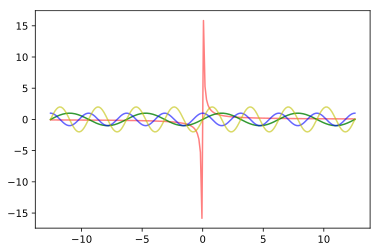

In [55]:
f1 = lambda x: 1/x
f2 = lambda x: np.sin(x)
f3 = lambda x: np.cos(2 * x)
f4 = lambda x: 2 * np.sin(2 * x)
x = np.linspace(-4 * np.pi, 4 * np.pi , 200)
p1 = plt.plot(x,f1(x), color = 'r', alpha = 0.5)
plt.plot(x,f2(x), color = 'g', alpha = 0.8)
plt.plot(x,f3(x), color = 'b', alpha = 0.6)
plt.plot(x,f4(x), color = 'y', alpha = 0.6)
# plt.show() # If using in Python Script

## Subplots

In many cases, we want the opposite of what we have just discussed. We want to plot the data sets in different subplots. MatplotLib has many ways to obtain the subplots of given plot. Here we will just discuss one of them.

    plt.subplot(nrows,ncols,active)
    
creates the subplots with shape $ nrows * ncols $, and selects a subplot for plotting specified on `active`. `active` is a `1` based index for selecting subplot. It selects subplots in row-wise order.

## Adding Title

Adding title to subplot can be achieved via
    
    plt.title('label')

Adding title to Super plot can be achieved by 

    plt.suptitle('label')


## An example

In the below example, Let's see all of the things discussed in action

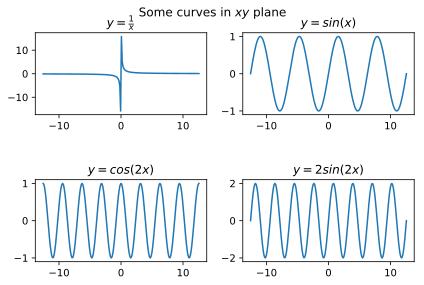

In [56]:
functions = [ lambda x: 1/x, lambda x: np.sin(x), lambda x: np.cos(2 * x), lambda x: 2 * np.sin(2 * x) ] 
lables = [r'$y = \frac{1}{x}$' , '$y = sin(x)$', '$y = cos(2x)$', '$y = 2 sin(2x)$' ]
x = np.linspace(-4 * np.pi, 4 * np.pi , 200)
plt.suptitle('Some curves in $xy$ plane')


for i,(function,label) in enumerate(zip(functions,lables),start = 1):  
    # zip() combines 2 iterables as list of tuples
    # enumerate() enumerated the zip here
    # enumerate returns an iterator through (count,value) tuples
    # but value is iteself is a tuple of (funciton,label) here
    # So we have to catch a tuple (count,(function,lablel))
    plt.subplot(2,2,i)
    plt.plot(x, function(x))
    plt.title(label)

plt.tight_layout(h_pad=3) # Exclude this and see what happens
# plt.show() # if using in script

## Plotting irregular data - Scatter and Bar Plots

Some data shows irregular pattern, due to which they can't be interpolated. When plotting such data, MatplotLib behaves crazily. In this situation, we have to use some other plotting method other than `plot()`. Before exploring other methods, Let's see a situation where ordinary plotting doesn't work.

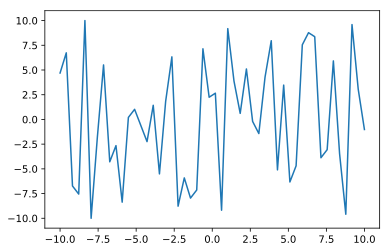

In [57]:
arr = np.linspace(-10,10)
x = np.copy(arr) # If you use x = arr, their reference will be copied
np.random.shuffle(arr)
plt.plot(x,arr)
# plt.show() # if using in Python Script

Above image does not seem to be like a plot of some Polynomial or Other function. In fact, We will not treat them as plot of some function. They are just **data**.

To visualize this kind of data, Scatter and Bar plots can be used

### Scatter Plot


Scatter plot only plots the sample points, instead of interpolation and drawing lines between them. It takes the same arguments as that of `plot()`. Let's see one

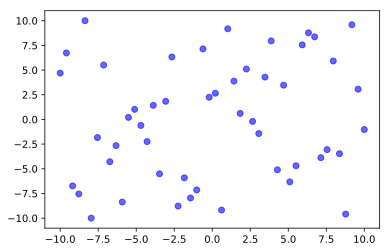

In [58]:
plt.scatter(x, arr, color='b',alpha = 0.6)

Note how we changed the color and alpha of plot.

### Bar Plot
Bar plot visualizes the data as bars, whose height is proportional to the magnitude of data. Let's plot the same data as bar chart and understand it's customization.

<Container object of 50 artists>

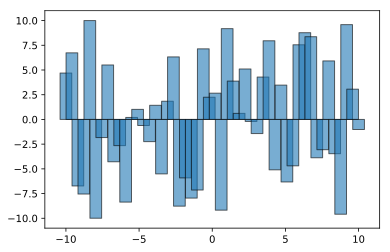

In [59]:
plt.bar(x, arr, alpha = 0.6, edgecolor='k')

Note how rectangle edges are visible with black color. Overlapping rectangles are also visible with $\alpha = 0.6$

## Visualizing 2D Data - Matrix

A matrix can be interpreted as values of a function $f(i,j)$ where $i$ and $j$ are indices of matrix. Now $f$ can be visualized as a surface over $ij plane$. This requires switching to 3D co-ordinates. Instead of doing that, one can visualize the same in 2D plane by mapping the each value to a colormap. In MatplotLib, we can do this by `imshow()` and `matshow()`

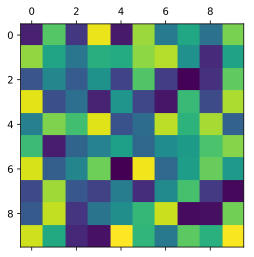

In [60]:
data = np.arange(100)
np.random.shuffle(data)
data.shape = (10,10)
plt.matshow(data)

To know what color means what value, one can enable the `colorbar`

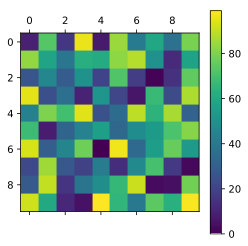

In [61]:
plt.matshow(data)
plt.colorbar()

Let's experiment with some large data

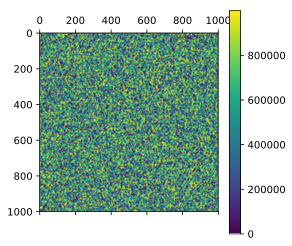

In [62]:
n = 1000
data = np.arange(n**2)
np.random.shuffle(data)
data.shape = (n,n)
plt.matshow(data)
plt.colorbar()

It looks like above plot is like a random image. In fact, images are also matrices. Different file formats like `jpeg`,`png` and `tiff` store the matrix and associated data in different ways.

Consider an image with resolution `1900 * 1600 `

- Its data is a matrix with shape `(1900 , 1600)`
- If it is a color image, Each element of matrix is either a value, 3-tuple or 4-tuple based on it's color scheme
- If image is monochromatic, each element of matrix is value. 0 representing white, 255 representing black
- If color scheme of image is RGB, each element of matrix is `(Red,Green,Black)` tuple with each element ranging from 0 to 256
- If color scheme of image is CMYK, each element of matrix is `(Cyan,Magenta,Yellow,blacK)` tuple with each element ranging from 0 to 256


Since image is a matrix, any operation on matrix is a operation on image. It is the basis of how Photo Editing Softwares work. It is also the fundamental of a field of Computer Science known as **Image Processing**

## Going Further

In this tutorial, we have seen just the fundamentals of Data Visualizations using `matplotlib`. There are many more kinds of plots, one can even animate the plots. Interested reader can refer [Official Tutorial](https://matplotlib.org/users/pyplot_tutorial.html)